In [1]:
from protrend.utils import NeoDatabase, Settings

neo_db = NeoDatabase(user_name=Settings.db_user_name, password=Settings.db_password,
                     ip=Settings.db_ip, port=Settings.db_port)
neo_db.connect()

In [2]:
import numpy as np
import pandas as pd

# organism out-degree distribution
organism_dfs = []
for label in ('Regulator', 'Gene', 'TFBS', 'RegulatoryInteraction'):

    res = neo_db.db.cypher_query(f"match(o:Organism)-[]-(r:{label}) return o.protrend_id, count(distinct(r.protrend_id))")

    tmp = pd.DataFrame(res[0], columns=['Organism', 'Out-Degree (Kout)'])
    tmp['Out-Degree (Kout)'] = np.log(tmp[['Out-Degree (Kout)']])
    tmp['Entity'] = label

    organism_dfs.append(tmp)

organism_degree = pd.concat(organism_dfs, ignore_index=True)
organism_degree = organism_degree.loc[:, ['Out-Degree (Kout)', 'Entity']]
organism_degree

,Out-Degree (Kout),Entity
0,0.000000,Regulator
1,0.000000,Regulator
2,0.000000,Regulator
3,2.890372,Regulator
4,4.043051,Regulator
...,...,...
2099,5.389072,RegulatoryInteraction
2100,5.278115,RegulatoryInteraction
2101,5.983936,RegulatoryInteraction
2102,5.634790,RegulatoryInteraction


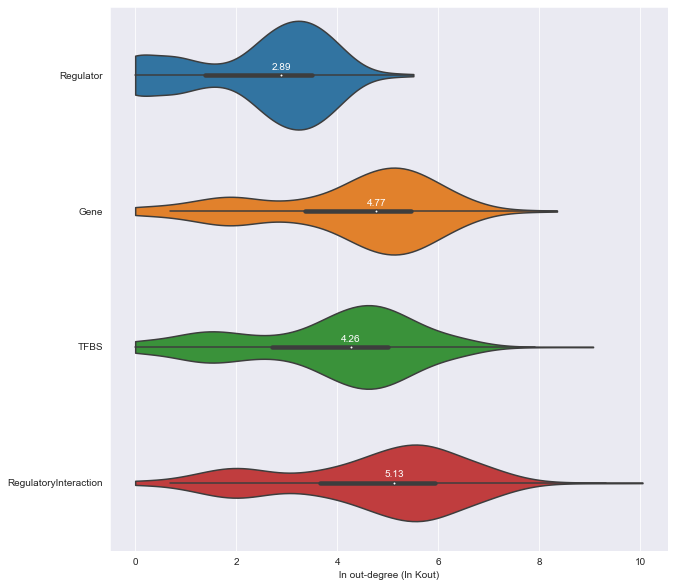

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

medians = organism_degree.groupby(['Entity'])['Out-Degree (Kout)'].median()
medians = [medians['Regulator'], medians['Gene'], medians['TFBS'], medians['RegulatoryInteraction']]

plt.figure(figsize=(10, 10))

ax = sns.violinplot(x=organism_degree['Out-Degree (Kout)'], y=organism_degree['Entity'], cut=0)

pos = range(len(medians))
for tick, _ in zip(pos, ax.get_yticklabels()):
   ax.text(medians[tick], pos[tick] - 0.04, round(medians[tick], 2),
            horizontalalignment='center',
            color='white')

plt.ylabel('')
plt.xlabel('ln out-degree (ln Kout)')

plt.savefig("organism_degree.png", bbox_inches="tight", dpi=150)
plt.show()

In [5]:
import pandas as pd

# organism top out-degree distribution
top_dfs = []
for label in ('Regulator', 'Gene', 'TFBS', 'RegulatoryInteraction'):

    res = neo_db.db.cypher_query(f"match(o:Organism)-[]-(r:{label}) return o.protrend_id, o.name, count(distinct(r.protrend_id))")

    tmp = pd.DataFrame(res[0], columns=['Organism ID', 'Organism Name', 'Out-Degree (Kout)'])
    tmp['label'] = label
    top_dfs.append(tmp)

top_degree = pd.concat(top_dfs, ignore_index=True)
top_degree = top_degree.set_index('Organism ID')
top_degree

,Organism Name,Out-Degree (Kout),label
Organism ID,,,
PRT.ORG.0000002,Acidobacterium capsulatum ATCC 51196,1,Regulator
PRT.ORG.0000003,Acinetobacter baumannii ATCC 17978,1,Regulator
PRT.ORG.0000004,Actinobacillus pleuropneumoniae serovar 5b str...,1,Regulator
PRT.ORG.0000005,Actinobacillus pleuropneumoniae serovar 7 str....,18,Regulator
PRT.ORG.0000006,Agrobacterium fabrum str. C58,57,Regulator
...,...,...,...
PRT.ORG.0000609,Idiomarina baltica OS145,219,RegulatoryInteraction
PRT.ORG.0000610,Glaciecola sp. HTCC2999,196,RegulatoryInteraction
PRT.ORG.0000611,Colwellia psychrerythraea 34H,397,RegulatoryInteraction


In [15]:
# get top 20 regulators
top_degree_regulators = top_degree[top_degree['label'] == 'Regulator'].sort_values(by='Out-Degree (Kout)', ascending=False).head(20)
top_degree_regulators

,Organism Name,Out-Degree (Kout),label
Organism ID,,,
PRT.ORG.0000012,Bacillus subtilis subsp. subtilis str. 168,246,Regulator
PRT.ORG.0000035,Escherichia coli str. K-12 substr. MG1655,233,Regulator
PRT.ORG.0000028,Corynebacterium glutamicum ATCC 13032,178,Regulator
PRT.ORG.0000074,Pseudomonas aeruginosa PAO1,168,Regulator
PRT.ORG.0000060,Mycobacterium tuberculosis H37Rv,122,Regulator
PRT.ORG.0000170,Bacillus licheniformis DSM 13 = ATCC 14580,118,Regulator
PRT.ORG.0000010,Bacillus velezensis FZB42,108,Regulator
PRT.ORG.0000169,Bacillus pumilus SAFR-032,90,Regulator
PRT.ORG.0000540,Klebsiella pneumoniae subsp. pneumoniae MGH 78578,86,Regulator


In [16]:
# selecting rows for the top 20 regulators
top_degree_data = top_degree.loc[top_degree_regulators.index, :]
top_degree_data = top_degree_data.reset_index()
top_degree_data

,Organism ID,Organism Name,Out-Degree (Kout),label
0,PRT.ORG.0000012,Bacillus subtilis subsp. subtilis str. 168,246,Regulator
1,PRT.ORG.0000012,Bacillus subtilis subsp. subtilis str. 168,2231,Gene
2,PRT.ORG.0000012,Bacillus subtilis subsp. subtilis str. 168,2712,TFBS
3,PRT.ORG.0000012,Bacillus subtilis subsp. subtilis str. 168,11135,RegulatoryInteraction
4,PRT.ORG.0000035,Escherichia coli str. K-12 substr. MG1655,233,Regulator
...,...,...,...,...
75,PRT.ORG.0000167,Oceanobacillus iheyensis HTE831,1075,RegulatoryInteraction
76,PRT.ORG.0000095,Shewanella sp. ANA-3,63,Regulator
77,PRT.ORG.0000095,Shewanella sp. ANA-3,770,Gene
78,PRT.ORG.0000095,Shewanella sp. ANA-3,626,TFBS


c:\users\bisbii\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 1440x720 with 0 Axes>

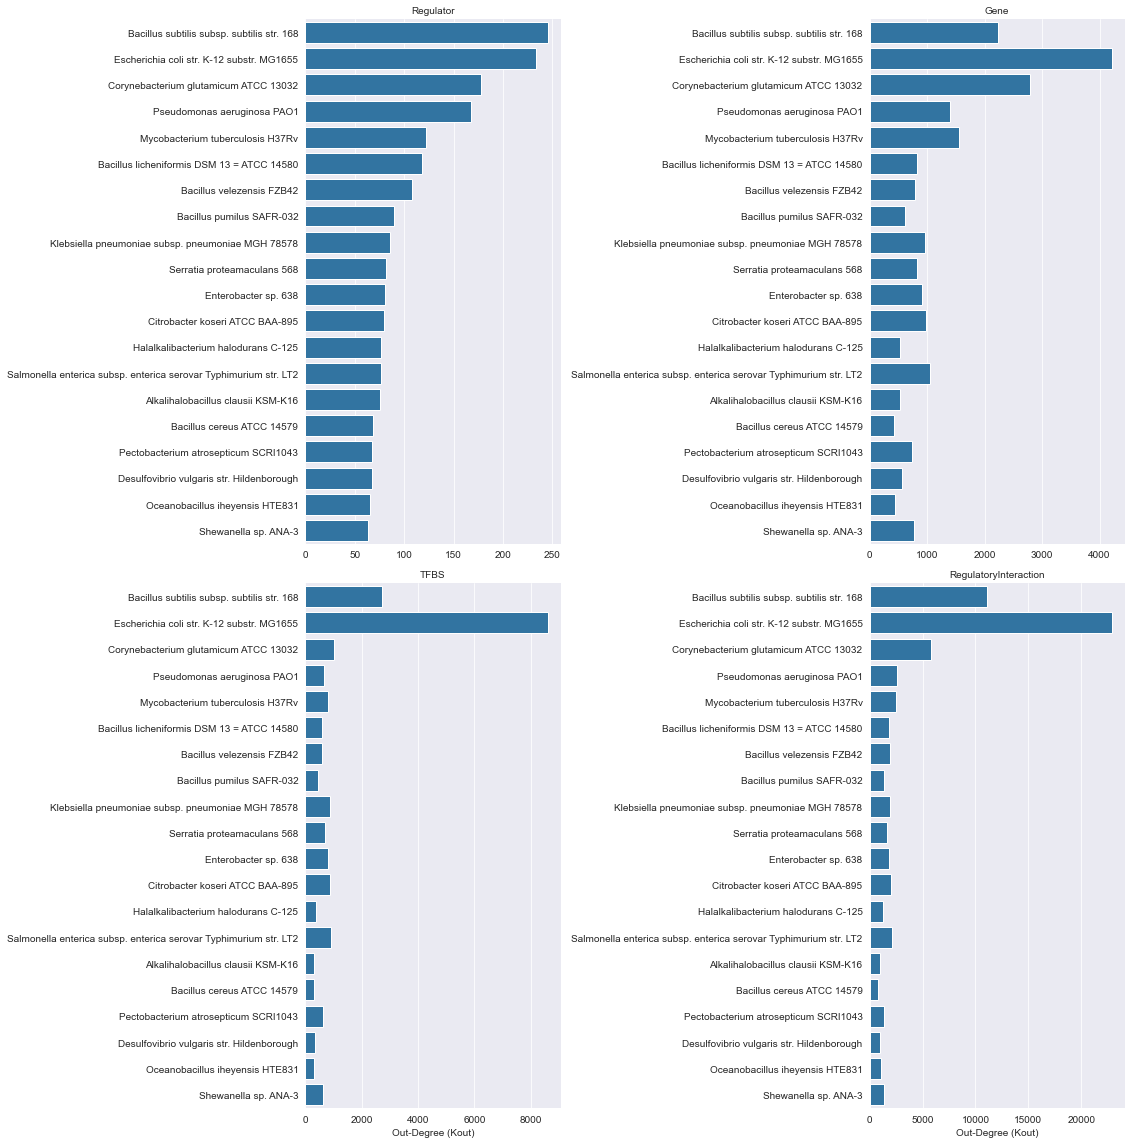

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 10))

g = sns.FacetGrid(top_degree_data,
                  col="label",
                  col_wrap=2,
                  sharex=False,
                  sharey=False,
                  height=8)

g.map(sns.barplot, "Out-Degree (Kout)", "Organism Name")

g.set_ylabels('')

g.set_titles("{col_name}")

plt.savefig("organism_degree_top.png", bbox_inches="tight", dpi=150)
plt.show()

In [10]:
import numpy as np
import pandas as pd

# regulator out-degree distribution
regulator_dfs = []
for label in ('Gene', 'TFBS', 'RegulatoryInteraction'):

    res = neo_db.db.cypher_query(f"match(o:Regulator)-[]-(r:{label}) return o.protrend_id, count(distinct(r.protrend_id))")

    tmp = pd.DataFrame(res[0], columns=['Regulator', 'Out-Degree (Kout)'])
    tmp['Out-Degree (Kout)'] = np.log(tmp[['Out-Degree (Kout)']])
    tmp['Entity'] = label

    regulator_dfs.append(tmp)

regulator_degree = pd.concat(regulator_dfs, ignore_index=True)
regulator_degree = regulator_degree.loc[:, ['Out-Degree (Kout)', 'Entity']]
regulator_degree

,Out-Degree (Kout),Entity
0,0.693147,Gene
1,0.000000,Gene
2,1.098612,Gene
3,0.000000,Gene
4,0.000000,Gene
...,...,...
36558,1.386294,RegulatoryInteraction
36559,0.000000,RegulatoryInteraction
36560,0.000000,RegulatoryInteraction
36561,1.098612,RegulatoryInteraction


In [89]:
pd.concat(regulator_dfs, ignore_index=True).sort_values(by='Out-Degree (Kout)', ascending=False)

,Regulator,Out-Degree (Kout),Entity
24454,PRT.REG.0000202,2598,RegulatoryInteraction
24450,PRT.REG.0000198,2461,RegulatoryInteraction
12490,PRT.REG.0000202,2107,TFBS
36000,PRT.REG.0011761,2101,RegulatoryInteraction
36090,PRT.REG.0011852,2067,RegulatoryInteraction
...,...,...,...
27628,PRT.REG.0003388,1,RegulatoryInteraction
18258,PRT.REG.0005982,1,TFBS
18253,PRT.REG.0005977,1,TFBS
18245,PRT.REG.0005969,1,TFBS


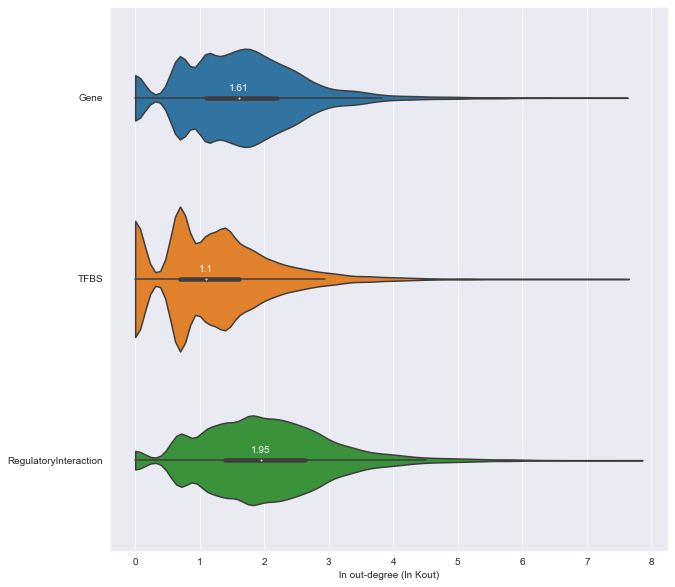

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

medians = regulator_degree.groupby(['Entity'])['Out-Degree (Kout)'].median()
medians = [medians['Gene'], medians['TFBS'], medians['RegulatoryInteraction']]

plt.figure(figsize=(10, 10))

ax = sns.violinplot(x=regulator_degree['Out-Degree (Kout)'], y=regulator_degree['Entity'], cut=0, height=15)

pos = range(len(medians))
for tick, _ in zip(pos, ax.get_yticklabels()):
   ax.text(medians[tick], pos[tick] - 0.04, round(medians[tick], 2),
            horizontalalignment='center',
            color='white')

plt.ylabel('')
plt.xlabel('ln out-degree (ln Kout)')

plt.savefig("regulator_degree.png", bbox_inches="tight", dpi=150)
plt.show()

In [12]:
import pandas as pd

res = neo_db.db.cypher_query("match(o:RegulatoryFamily)-[]-(r:Regulator) return o.name, count(distinct(r.protrend_id))")

rfam_df = pd.DataFrame(res[0], columns=['RegulatoryFamily', 'Out-Degree (Kout)'])
# tmp['Out-Degree (Kout)'] = np.log(tmp[['Out-Degree (Kout)']])

rfam_df = rfam_df.sort_values(by='Out-Degree (Kout)', ascending=False).head(10)
rfam_df

,RegulatoryFamily,Out-Degree (Kout)
37,GntR/Others,1488
32,LacI,1398
38,GntR/MocR,749
5,TetR,689
40,Fur,601
26,MerR,599
29,LysR,447
41,Fis,428
19,NrdR,362
11,Rrf2,331


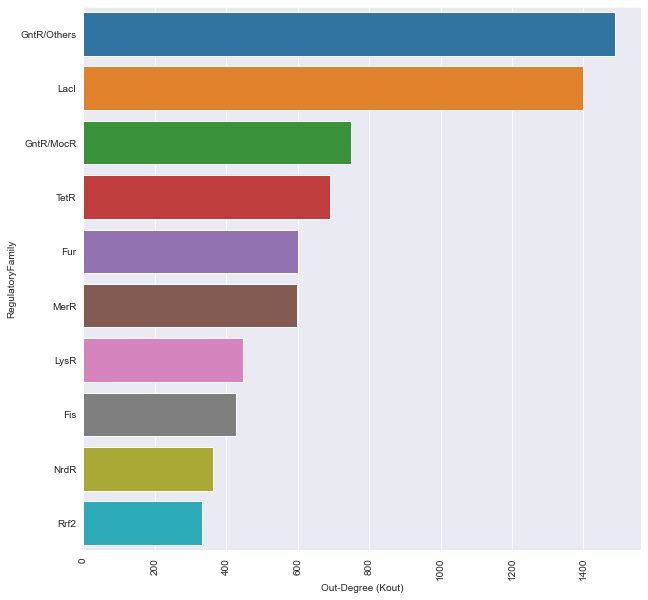

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,10))

barplot = sns.barplot(x=rfam_df['Out-Degree (Kout)'], y=rfam_df['RegulatoryFamily'])

for item in barplot.get_xticklabels():
    item.set_rotation(90)

plt.savefig("rfam_regulator_distribution.png", bbox_inches="tight", dpi=150)

plt.show()

In [19]:
from protrend.model import Regulator

# regulator mechanism table
regulators = Regulator.node_to_df()
mechanisms = regulators['mechanism'].value_counts()
mechanisms

transcription factor        11899
unknown                       372
sigma factor                   26
small rna (srna)                3
transcription terminator        1
Name: mechanism, dtype: int64

In [21]:
from protrend.model import Motif

# motifs
motifs = Motif.node_to_df()
motifs

,uid,protrend_id,created,updated,locus_tag,locus_tag_factor,regulator,tfbs,sequences,consensus_sequence,number of sequences
0,adc5a7c58ff9441d98a0634dd87c40dd,PRT.MOT.0000001,2022-09-01 18:12:43.423348+00:00,2022-09-01 18:12:43.423348+00:00,NP943_11140,np943_11140,PRT.REG.0000001,"[PRT.TBS.0002269, PRT.TBS.0002268, PRT.TBS.000...","[--ACAAGCCATGAAAAC-, ---ACAGTCATAACAAGC, --GTA...",--GAAAGTCAAAACAAC-,5
1,4975603e63b042f99f8ecb9644aff092,PRT.MOT.0000002,2022-09-01 18:12:43.437554+00:00,2022-09-01 18:12:43.437554+00:00,NP943_07365,np943_07365,PRT.REG.0000002,[PRT.TBS.0002797],[GACTGTTTTTTTGTACAGTC],GACTGTTTTTTTGTACAGTC,1
2,64fad2e821bf45f4984cf11c91348b43,PRT.MOT.0000003,2022-09-01 18:12:43.440405+00:00,2022-09-01 18:12:43.440405+00:00,sll1874,sll1874,PRT.REG.0000003,"[PRT.TBS.0000028, PRT.TBS.0000027, PRT.TBS.000...","[TGTGATCCAGATCACA, TGTGAGAATAATCACA, TGTGATCTA...",TGTGATCAAGATCACA,3
3,65bd827a214c45219c6c64df3c0235e4,PRT.MOT.0000004,2022-09-01 18:12:43.444416+00:00,2022-09-01 18:12:43.444416+00:00,sll1626,sll1626,PRT.REG.0000004,[PRT.TBS.0000024],[AACAACACCCAGAACCTAGTAACTAGTTCGACTTACCCTCCTTTC...,AACAACACCCAGAACCTAGTAACTAGTTCGACTTACCCTCCTTTCTTCG,1
4,00701d7eead04273bd6a16af39b5cb86,PRT.MOT.0000005,2022-09-01 18:12:43.447977+00:00,2022-09-01 18:12:43.447977+00:00,sll0822,sll0822,PRT.REG.0000005,[PRT.TBS.0000025],[TTGAACAAAC],TTGAACAAAC,1
...,...,...,...,...,...,...,...,...,...,...,...
11961,b013e68b30eb484a803b9f49e386ae53,PRT.MOT.0011962,2022-09-01 18:13:23.491234+00:00,2022-09-01 18:13:23.491234+00:00,Rv3855,rv3855,PRT.REG.0012440,"[PRT.TBS.0070019, PRT.TBS.0070020]","[----GGAGGTGGTCACC-, TCGGCGACTTCGACACTG]",TCGGGGAGTTGGACACTG,2
11962,cfc5ed4ba00b452e880f063a2551086c,PRT.MOT.0011963,2022-09-01 18:13:23.493235+00:00,2022-09-01 18:13:23.493235+00:00,Rv3862c,rv3862c,PRT.REG.0012441,"[PRT.TBS.0070023, PRT.TBS.0070021, PRT.TBS.007...","[GGCATACCGCA--, GGCATCGCGAAC-, -GCATTGAGTACC]",GGCATAGCGAAC-,3
11963,f883fdade2d84a59bcc3000334fa07cf,PRT.MOT.0011964,2022-09-01 18:13:23.497234+00:00,2022-09-01 18:13:23.497234+00:00,BSU_03750,bsu_03750,PRT.REG.0012447,"[PRT.TBS.0070968, PRT.TBS.0070967, PRT.TBS.007...",[---------------------------------ATCGCTATGCAT...,------------------TTA-TTG-ATTTTCATTGTTTATTCATA...,5
11964,d18d77b5d5b9405bacdb380c8abe0d0f,PRT.MOT.0011965,2022-09-01 18:13:23.499234+00:00,2022-09-01 18:13:23.499234+00:00,BSU_22770,bsu_22770,PRT.REG.0012455,"[PRT.TBS.0070955, PRT.TBS.0070954, PRT.TBS.007...",[----AAGTAAAGGAGAAAAGCTGAGCTGAGATGAGAGCAGAAGAG...,----AAGAAAAGAATTAGAGCTGAGCGAAGAAGAGAAAAAAATTAG...,3


In [23]:
def gc_content(consensus: str):
    consensus = consensus.replace('-', '')
    gc_count = consensus.count('G') + consensus.count('C')
    return gc_count / len(consensus)


motifs['GC content'] = motifs['consensus_sequence'].apply(gc_content)
motifs

,uid,protrend_id,created,updated,locus_tag,locus_tag_factor,regulator,tfbs,sequences,consensus_sequence,number of sequences,GC content
0,adc5a7c58ff9441d98a0634dd87c40dd,PRT.MOT.0000001,2022-09-01 18:12:43.423348+00:00,2022-09-01 18:12:43.423348+00:00,NP943_11140,np943_11140,PRT.REG.0000001,"[PRT.TBS.0002269, PRT.TBS.0002268, PRT.TBS.000...","[--ACAAGCCATGAAAAC-, ---ACAGTCATAACAAGC, --GTA...",--GAAAGTCAAAACAAC-,5,0.333333
1,4975603e63b042f99f8ecb9644aff092,PRT.MOT.0000002,2022-09-01 18:12:43.437554+00:00,2022-09-01 18:12:43.437554+00:00,NP943_07365,np943_07365,PRT.REG.0000002,[PRT.TBS.0002797],[GACTGTTTTTTTGTACAGTC],GACTGTTTTTTTGTACAGTC,1,0.350000
2,64fad2e821bf45f4984cf11c91348b43,PRT.MOT.0000003,2022-09-01 18:12:43.440405+00:00,2022-09-01 18:12:43.440405+00:00,sll1874,sll1874,PRT.REG.0000003,"[PRT.TBS.0000028, PRT.TBS.0000027, PRT.TBS.000...","[TGTGATCCAGATCACA, TGTGAGAATAATCACA, TGTGATCTA...",TGTGATCAAGATCACA,3,0.375000
3,65bd827a214c45219c6c64df3c0235e4,PRT.MOT.0000004,2022-09-01 18:12:43.444416+00:00,2022-09-01 18:12:43.444416+00:00,sll1626,sll1626,PRT.REG.0000004,[PRT.TBS.0000024],[AACAACACCCAGAACCTAGTAACTAGTTCGACTTACCCTCCTTTC...,AACAACACCCAGAACCTAGTAACTAGTTCGACTTACCCTCCTTTCTTCG,1,0.448980
4,00701d7eead04273bd6a16af39b5cb86,PRT.MOT.0000005,2022-09-01 18:12:43.447977+00:00,2022-09-01 18:12:43.447977+00:00,sll0822,sll0822,PRT.REG.0000005,[PRT.TBS.0000025],[TTGAACAAAC],TTGAACAAAC,1,0.300000
...,...,...,...,...,...,...,...,...,...,...,...,...
11961,b013e68b30eb484a803b9f49e386ae53,PRT.MOT.0011962,2022-09-01 18:13:23.491234+00:00,2022-09-01 18:13:23.491234+00:00,Rv3855,rv3855,PRT.REG.0012440,"[PRT.TBS.0070019, PRT.TBS.0070020]","[----GGAGGTGGTCACC-, TCGGCGACTTCGACACTG]",TCGGGGAGTTGGACACTG,2,0.611111
11962,cfc5ed4ba00b452e880f063a2551086c,PRT.MOT.0011963,2022-09-01 18:13:23.493235+00:00,2022-09-01 18:13:23.493235+00:00,Rv3862c,rv3862c,PRT.REG.0012441,"[PRT.TBS.0070023, PRT.TBS.0070021, PRT.TBS.007...","[GGCATACCGCA--, GGCATCGCGAAC-, -GCATTGAGTACC]",GGCATAGCGAAC-,3,0.583333
11963,f883fdade2d84a59bcc3000334fa07cf,PRT.MOT.0011964,2022-09-01 18:13:23.497234+00:00,2022-09-01 18:13:23.497234+00:00,BSU_03750,bsu_03750,PRT.REG.0012447,"[PRT.TBS.0070968, PRT.TBS.0070967, PRT.TBS.007...",[---------------------------------ATCGCTATGCAT...,------------------TTA-TTG-ATTTTCATTGTTTATTCATA...,5,0.142857
11964,d18d77b5d5b9405bacdb380c8abe0d0f,PRT.MOT.0011965,2022-09-01 18:13:23.499234+00:00,2022-09-01 18:13:23.499234+00:00,BSU_22770,bsu_22770,PRT.REG.0012455,"[PRT.TBS.0070955, PRT.TBS.0070954, PRT.TBS.007...",[----AAGTAAAGGAGAAAAGCTGAGCTGAGATGAGAGCAGAAGAG...,----AAGAAAAGAATTAGAGCTGAGCGAAGAAGAGAAAAAAATTAG...,3,0.350877


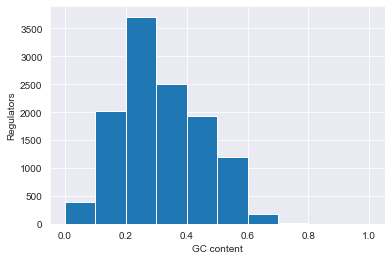

In [34]:
import matplotlib.pyplot as plt

motifs['GC content'].hist(bins=10)

plt.xlabel("GC content")
plt.ylabel("Regulators")

plt.savefig("motif_gc_content.png", bbox_inches="tight", dpi=150)
plt.show()

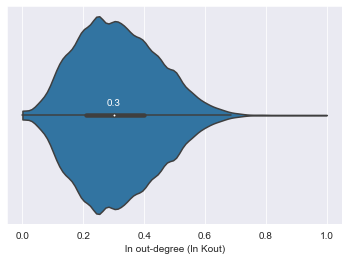

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns

medians = motifs['GC content'].median()
medians = [medians]

ax = sns.violinplot(x=motifs['GC content'], cut=0, height=15)

pos = range(len(medians))
for tick, _ in zip(pos, ax.get_yticklabels()):
    ax.text(medians[tick], pos[tick] - 0.04, round(medians[tick], 2),
            horizontalalignment='center',
            color='white')

plt.ylabel('')
plt.xlabel('ln out-degree (ln Kout)')

# plt.savefig("regulator_degree.png", bbox_inches="tight", dpi=150)
plt.show()